In [ ]:
#!pip install nltk
#!pip install konlpy
#!apt-get update -qq
#!apt-get install fonts-nanum* -qq

In [1]:
from collections import Counter
from konlpy.tag import Hannanum
from wordcloud import WordCloud
from PIL import Image
import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt

def flatten(l):
  flatList = []
  for elem in l:
    if type(elem) == list:
      for e in elem:
        flatList.append(e)
    else:
      flatList.append(elem)
  return flatList

In [22]:
with open('생기부.txt', 'r', encoding='UTF-8') as f:
  lines = f.readlines()

hannanum = Hannanum()

temp = []
for i in range(len(lines)):
  temp.append(hannanum.nouns(lines[i]))

word_list = flatten(temp)

stop_words = [
  '활동',
  '탐구',
  '발표',
  '참여',
  '수업',
  '주제',
  '친구들',
  '이해',
  '제시',
  '프로젝트',
  '능력',
  '과정',
  '자신',
  '활용',
  '내용',
  '작성',
  '설명',
  '표현',
  '모습',
  '학습',
  '제작',
  '인간',
  '진행',
  '바탕',
  '온라인',
  '변화',
  '관련',
  '다양한',
  '시간',
  '학생',
  '문제',
  '분야',
  '수행',
  '의견',
  '개념',
  '자료',
  '적극적',
  '보고서',
  '토론',
  '의미',
  '에세이',
  '성장',
  '연습',
  '우리',
  '생활',
  '사용',
  '해결',
  '흥미',
  '노력',
  '관심',
  '우수',
  '관계',
  '역사',
  '세계',
  '갯벌',
]

word_list = [x for x in word_list if not x in stop_words]
word_list = pd.Series([x for x in word_list if len(x) > 1])
word_list.value_counts().head(20)

분석       18
스페인어     15
언어       15
경제       14
기술       12
사회       12
문화       11
프로그래밍    11
인공지능     10
프로그램     10
공유       10
사진        9
과학        9
기업        8
비교        8
발전        8
역량        8
역할        8
개발        8
미래        8
dtype: int64

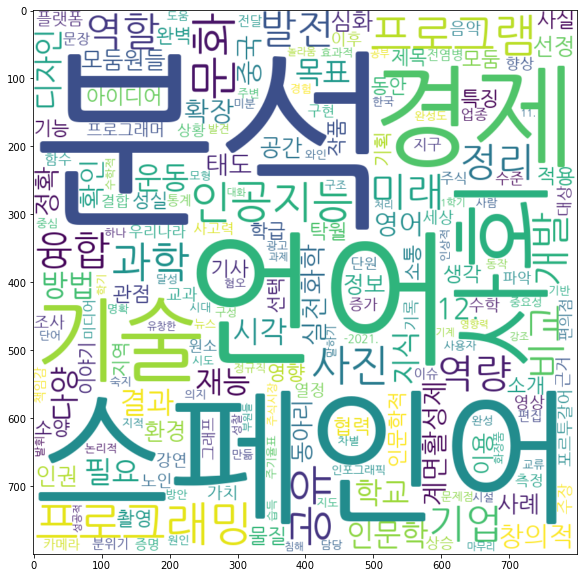

In [24]:
wordcloud = WordCloud(
    font_path = 'NanumGothic',
    width = 800,
    height = 800,
    background_color = 'white'
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)
array = np.array(wordcloud.to_image())

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation = 'bilinear')
plt.show()
fig.savefig('wordcloud.png')